In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Hide future version warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA

# Set plot style
plt.style.use('seaborn-v0_8')

In [2]:
# Get the iris data
def get_data():
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    return df, iris.target_names

# Load and show first 5 rows
df, species_names = get_data()
print(f"Data size: {df.shape}")
df.head()

Data size: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Define X and y
X = df.drop('species', axis=1)
y = df['species']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make numbers standard
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data is ready.")

Data is ready.


In [4]:
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Check accuracy for each model
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results.append({"Model": name, "Accuracy": scores.mean()})

# Print results
perf_df = pd.DataFrame(results)
print(perf_df.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy
0  Logistic Regression  0.958333
2                  SVM  0.950000
3        Random Forest  0.950000
1                  KNN  0.925000


In [5]:
# Parameters for search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['multinomial']
}

# Start GridSearch
grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Show best parameters
print(f"Best settings: {grid_search.best_params_}")
print(f"Best training score: {grid_search.best_score_:.4f}")

Best settings: {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best training score: 0.9583


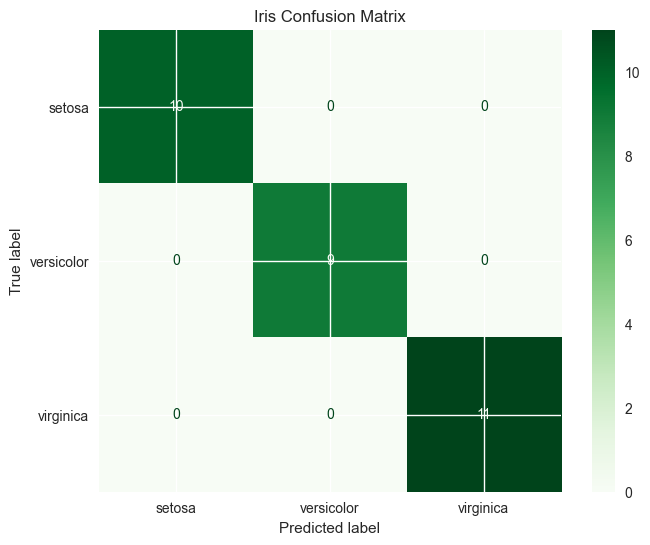


--- Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
# Get the best model
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test_scaled)

# Draw Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(final_model, X_test_scaled, y_test, 
                                      display_labels=species_names, cmap='Greens', ax=ax)
ax.set_title("Iris Confusion Matrix")
plt.show()

# Show full report
print("\n--- Report ---")
print(classification_report(y_test, y_pred, target_names=species_names))